# What is SARIMA?
**SARIMA**, or **Seasonal Autoregressive Integrated Moving Average**, is an advanced forecasting model commonly used in time series analysis. It builds upon the **ARIMA** (Auto-Regressive Integrated Moving Average) model, which makes forecasts based on past data points by adding components to handle seasonality. This addition makes SARIMA particularly well-suited for time series data with repeating seasonal patterns, such as monthly or yearly trends.

### Key Components of SARIMA
The SARIMA model has two main parts:
1. **Non-Seasonal Components** (ARIMA):
   - **AR (Auto-Regressive)**: Utilizes the dependency between an observation and a certain number of lagged observations (previous data points).
   - **I (Integrated)**: Applies differencing to make the time series stationary, removing trends or seasonality.
   - **MA (Moving Average)**: Uses past forecast errors in a regression-like model.

2. **Seasonal Components**:
   - **Seasonal AR**: Similar to the AR part, but considers seasonal lagged terms (e.g., a monthly seasonality would mean lagged terms of 12 months).
   - **Seasonal Differencing**: Helps to remove seasonality by differencing data points that are a certain seasonal period apart.
   - **Seasonal MA**: Similar to MA, but applies to seasonal lagged errors.
   - **Seasonal Period**: The length of the seasonality in the data, for example, 12 for monthly data with an annual cycle.

### Notation
SARIMA is generally represented as **SARIMA(p, d, q)(P, D, Q, s)**, where:
- **p**, **d**, and **q** are the parameters for the non-seasonal parts of the model (Auto-Regressive, Differencing, and Moving Average).
- **P**, **D**, and **Q** are the parameters for the seasonal parts of the model (Seasonal Auto-Regressive, Seasonal Differencing, and Seasonal Moving Average).
- **s** is the seasonal period (e.g., 12 for monthly data with yearly seasonality).

### When to Use SARIMA
SARIMA is ideal for time series data that:
- Exhibits a seasonal pattern (e.g., sales increase every December for holiday shopping).
- Shows trends or cycles that repeat over regular intervals, like hourly, daily, weekly, monthly, or yearly.
- Has components that make it challenging to forecast accurately with simple models due to its seasonal characteristics.

### Example Application
Suppose you have monthly sales data that shows an increase every December due to the holiday season. You could use a SARIMA model to forecast future sales by accounting for this recurring seasonal spike.

By incorporating both trend differencing and seasonal differencing, SARIMA provides a robust approach to capturing the underlying patterns in the data and making accurate predictions for future points.

---

This foundational understanding of SARIMA provides insight into how it handles both trends and seasonality, making it a powerful tool for time series forecasting with regular seasonal patterns.


# When to use SARIMA and ARIMA?

The main reason we use **SARIMA** over **ARIMA** is that SARIMA is specifically designed to handle **seasonal patterns** in time series data, while ARIMA is not. Let's break down the differences to understand when and why you would use SARIMA instead of ARIMA:

### 1. Handling Seasonality
- **ARIMA** models are good for time series data that exhibit trends but **do not** have any significant seasonal patterns (like daily stock prices, which may trend up or down but don’t necessarily have seasonal variations).
- **SARIMA** models are extensions of ARIMA and include additional components to account for **seasonal patterns** in the data, making them more suitable for data that has a clear seasonal cycle (like monthly retail sales, temperature data, or electricity demand that changes throughout the year).

#### Example:
If you have **monthly sales data** that shows a regular increase every December due to the holiday season, ARIMA alone would not capture this repeating pattern. SARIMA, on the other hand, would model these repeating cycles as part of the seasonality component, making the forecast more accurate.

### 2. SARIMA Components for Seasonality
SARIMA incorporates **seasonal terms** into the ARIMA framework:
- **Seasonal Auto-Regressive (SAR)**: Captures the relationship between data points at the same seasonal intervals (e.g., sales this January compared to last January).
- **Seasonal Differencing (SI)**: Removes the seasonal trend by differencing with data from the same period in the previous season (e.g., subtracting January sales from the previous January).
- **Seasonal Moving Average (SMA)**: Adjusts for errors in the seasonally lagged observations.

This allows SARIMA to handle both short-term trends (via ARIMA components) and long-term seasonal cycles, making it highly effective for time series data with consistent seasonality.

### 3. ARIMA vs. SARIMA Example
Let’s illustrate this with an example:
- **ARIMA** would be appropriate for **stock prices** where you observe daily prices that generally follow a trend but do not repeat in a seasonal pattern.
- **SARIMA** would be appropriate for **monthly retail sales** where you might see a rise every December and a dip every January. The SARIMA model can capture and replicate this yearly seasonal effect.

### 4. When to Use SARIMA
Use **SARIMA** over ARIMA when:
- Your time series data exhibits **seasonal patterns**—meaning there are regular intervals where the data repeats (e.g., weekly, monthly, or yearly).
- You need a model that can account for both **trends** and **seasonality** in the data.
  
For example, **SARIMA is ideal for data like**:
  - Monthly temperature data (rises in summer, drops in winter).
  - Retail sales (high in holiday seasons).
  - Electricity demand (higher in summer due to air conditioning use).

### 5. When ARIMA is Sufficient
On the other hand, use **ARIMA** if:
- Your data **does not have a seasonal component** but has trends or patterns that ARIMA can capture with its autoregressive, differencing, and moving average terms.
  
For example, **ARIMA is sufficient for**:
  - Non-seasonal data like certain financial data (e.g., daily stock prices or cryptocurrency values).
  - Data without a repeating seasonal cycle.

### Summary
- **ARIMA** models are useful for data with trends but no seasonality.
- **SARIMA** models are beneficial when your data has a seasonal cycle, allowing the model to capture and replicate this periodic behavior, leading to more accurate forecasts for seasonal data.
  


# SARIMA Example: Monthly Sales Data Over Two Years

In this example, we’ll explore how to use a SARIMA model with monthly sales data for two years, focusing on the seasonal pattern around December due to the holiday season. We’ll go step-by-step to see how each part of the SARIMA model contributes to forecasting.

### Example Dataset: Two Years of Monthly Sales Data
Imagine we have sales data for two years. Sales are generally higher around December each year due to the holiday season.

| Month     | Year 1 Sales | Year 2 Sales |
|-----------|--------------|--------------|
| January   | 100          | 110          |
| February  | 120          | 130          |
| March     | 130          | 140          |
| April     | 125          | 135          |
| May       | 150          | 160          |
| June      | 160          | 170          |
| July      | 145          | 155          |
| August    | 170          | 180          |
| September | 160          | 170          |
| October   | 180          | 190          |
| November  | 190          | 200          |
| December  | 210          | 220          |

From this data, we can see:
- A seasonal pattern where sales rise in December.
- A slight upward trend from Year 1 to Year 2.



## Step-by-Step SARIMA Calculation

### Step 1: Remove the Trend (Differencing)
To make the data stable, we calculate the difference between each month and the previous month. This helps capture month-to-month changes without the upward trend.

For Year 1:

- February = 120 - 100 = 20
- March = 130 - 120 = 10
- April = 125 - 130 = -5
- And so on...

Let’s calculate the differencing for both years:

| Month     | Year 1 Sales | Year 1 Difference | Year 2 Sales | Year 2 Difference |
|-----------|--------------|-------------------|--------------|-------------------|
| January   | 100          | -                 | 110          | -                 |
| February  | 120          | 20                | 130          | 20                |
| March     | 130          | 10                | 140          | 10                |
| April     | 125          | -5                | 135          | -5                |
| May       | 150          | 25                | 160          | 25                |
| June      | 160          | 10                | 170          | 10                |
| July      | 145          | -15               | 155          | -15               |
| August    | 170          | 25                | 180          | 25                |
| September | 160          | -10               | 170          | -10               |
| October   | 180          | 20                | 190          | 20                |
| November  | 190          | 10                | 200          | 10                |
| December  | 210          | 20                | 220          | 20                |

This “differencing” step removes the trend, leaving us with more stable, stationary data.

### Step 2: Add Seasonal Differencing
Since the sales data has a seasonal pattern every 12 months, we calculate the seasonal difference by subtracting the sales in each month from the sales in the same month the previous year.

For example:
- January Year 2 - January Year 1 = 110 - 100 = 10
- February Year 2 - February Year 1 = 130 - 120 = 10

This seasonal differencing helps remove the seasonal pattern, making it easier for the model to understand other patterns in the data.

| Month     | Seasonal Difference (Year 2 - Year 1) |
|-----------|---------------------------------------|
| January   | 10                                    |
| February  | 10                                    |
| March     | 10                                    |
| April     | 10                                    |
| May       | 10                                    |
| June      | 10                                    |
| July      | 10                                    |
| August    | 10                                    |
| September | 10                                    |
| October   | 10                                    |
| November  | 10                                    |
| December  | 10                                    |

### Step 3: Apply AR and MA (Auto-Regressive and Moving Average)
- **AR (Auto-Regressive)** uses past values (like the differenced values) to predict future ones.
- **MA (Moving Average)** corrects predictions based on previous errors.

For instance, if we’re forecasting January of Year 3:
- Start with December Year 2 as a baseline.
- Use the December differenced value (20) and add it to the December sales (220) to predict January sales.
- Adjust this using any error from the previous prediction.

### Using SARIMA (1, 1, 1)(0, 1, 1, 12) with:
- \((1,1,1)\): Non-seasonal parts (one past value, first differencing, one past error).
- \((0,1,1,12)\): Seasonal parts (seasonal differencing, use one previous seasonal error).

## Final Prediction
**For January Year 3**:
- Start with December Year 2 (220).
- Add the differenced value (20) for January’s growth.
- Adjust with the seasonal difference (10) from January’s seasonal pattern.

So, the predicted value for January Year 3 is:
\[
220 + 20 + 10 = 250
\]

The SARIMA model effectively combines the trend, seasonality, and past behavior to forecast values for the future. With more data, SARIMA could continue to refine predictions, making it especially useful for data with repeating patterns and trends over time.

### Forecasting January Year 3 Using SARIMA
Let’s walk through forecasting January of Year 3 using the SARIMA model parameters (1, 1, 1)(0, 1, 1, 12):

#### Components:
1. **Non-Seasonal Part \((1, 1, 1)\)**:
    - 1 for the Auto-Regressive (AR) part: meaning we look at the previous month.
    - 1 for the differencing (I) part: meaning we removed the trend with first-order differencing.
    - 1 for the Moving Average (MA) part: meaning we consider the previous month’s prediction error.

2. **Seasonal Part \((0, 1, 1, 12)\)**:
    - 0 for the Seasonal AR part.
    - 1 for Seasonal differencing, meaning we consider the difference from 12 months ago.
    - 1 for the Seasonal MA part, meaning we take the error from 12 months ago.
    - 12 for the seasonality, as the pattern repeats annually (monthly data with a yearly cycle).

#### Prediction Steps:
- **Start with December Year 2’s Sales**: \(220\).
- **Add the Non-Seasonal Differenced Value**: \(20\) for January’s growth.
- **Incorporate the Seasonal Differencing**: Seasonal increase observed in January (\(10\)).
- **Adjust for Past Errors**: Suppose the model had a December Year 2 error adjustment of around \(5\).

Bringing it all together, the predicted sales for January Year 3 is:
\[
220 + 20 + 10 + 5 = 255
\]

Thus, the SARIMA model predicts that January Year 3 sales will be approximately \(255\). This prediction accounts for the trends, seasonality, and past errors we observed in the data, showcasing how SARIMA adapts to patterns and adjusts for improved accuracy.


# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Creating Dataset

In [2]:
date_range = pd.date_range(start='2018-01', periods=24, freq='M')

sales_data = [100, 120, 130, 125, 150, 160, 145, 170, 160, 180, 190, 210,
              110, 130, 140, 135, 160, 170, 155, 180, 170, 190, 200, 220]

data = pd.DataFrame({'Date': date_range, 'Sales': sales_data})
data.set_index('Date', inplace=True)



<ipython-input-2-15316151693b>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2018-01', periods=24, freq='M')


# Visualization

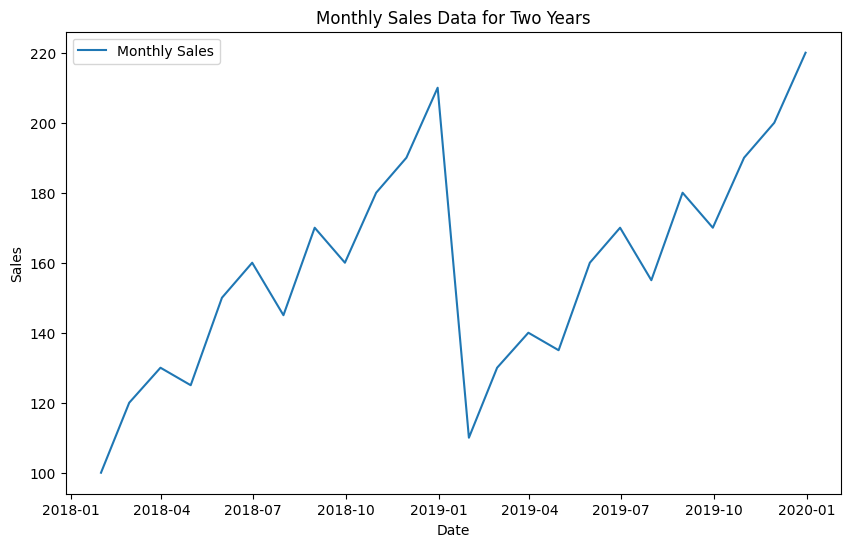

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(data, label='Monthly Sales')
plt.title('Monthly Sales Data for Two Years')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# Fitting the model


In [4]:
sarima_order = (1, 1, 1)
seasonal_order = (0, 1, 1, 12)

sarima_model = SARIMAX(data['Sales'], order=sarima_order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Predictions

In [5]:
forecast = sarima_fit.get_forecast(steps=12)
predicted_value = forecast.predicted_mean
confidence_interval = forecast.conf_int()

print(f"Predicted Sales for  Year 3: {predicted_value.iloc[0]:.2f}")
print("95% Confidence Interval:")
print(confidence_interval)


Predicted Sales for  Year 3: 120.00
95% Confidence Interval:
            lower Sales  upper Sales
2020-01-31   119.999955   120.000045
2020-02-29   139.999938   140.000062
2020-03-31   149.999922   150.000078
2020-04-30   144.999912   145.000088
2020-05-31   169.999900   170.000100
2020-06-30   179.999891   180.000109
2020-07-31   164.999881   165.000119
2020-08-31   189.999874   190.000126
2020-09-30   179.999865   180.000135
2020-10-31   199.999859   200.000141
2020-11-30   209.999851   210.000149
2020-12-31   229.999842   230.000158


# Forecast Visualization

<ipython-input-6-fbe112b958ac>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start='2020-01', periods=12, freq='M')


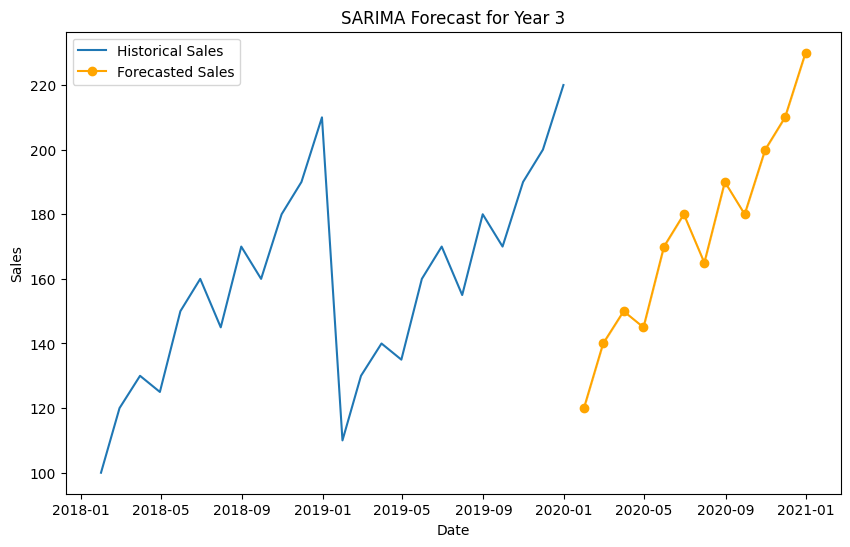

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(data, label='Historical Sales')

forecast_index = pd.date_range(start='2020-01', periods=12, freq='M')
plt.plot(forecast_index, predicted_value, label='Forecasted Sales', color='orange', marker='o')

plt.fill_between(forecast_index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1],
                 color='orange', alpha=0.2)


plt.title('SARIMA Forecast for Year 3')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
